In [1]:
import numpy as np
import pandas as pd

In [2]:
boston = pd.read_csv("C:\\Users\\Akhilesh\\Downloads\\1_boston_housing.csv")

In [3]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [27]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [28]:
x = boston.iloc[:, boston.columns != 'MEDV']
y = boston.iloc[:, boston.columns == 'MEDV']

In [29]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
# Standardize features (important for DNN performance)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
model = Sequential()
model.add(Dense(128, input_shape=(x_train.shape[1],), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_output (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.1, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 74s 123ms/step - loss: 603.1409 - mae: 22.7300 - val_loss: 541.4664 - val_mae: 21.7368
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 533.1916 - mae: 21.1533 - val_loss: 456.3756 - val_mae: 19.7740
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 437.3151 - mae: 18.7080 - val_loss: 345.4976 - val_mae: 16.9229
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 317.2063 - mae: 15.5858 - val_loss: 213.6193 - val_mae: 12.9789
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 191.4784 - mae: 11.5874 - val_loss: 99.7116 - val_mae: 8.2706
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 92.2655 - mae: 7.6109 - val_loss: 48.8609 - val_mae: 4.8054
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 50.3889 - mae: 5.4865 - val_loss: 38.4895 - val_mae: 3.8968
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 43.3083 - mae: 4.8976 - val_loss: 35.0711 - val_mae: 3.6677
Epoch 9/100
12/12 ━━

In [38]:
loss, mae = model.evaluate(x_test, y_test)
print(f"Test MAE: {mae:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.5263 - mae: 2.0374
Test MAE: 2.1641


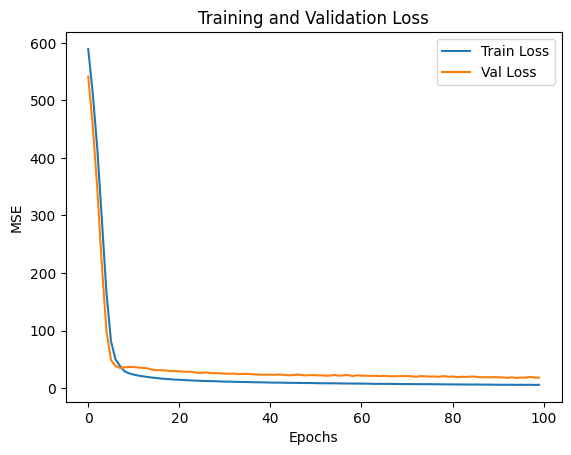

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Training and Validation Loss")
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


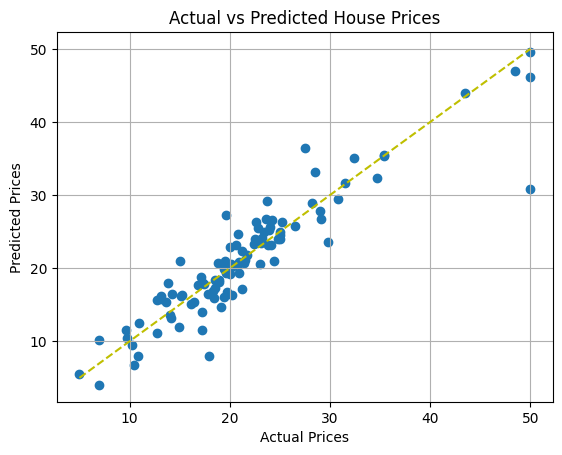

In [47]:
# Predict on test set
y_pred = model.predict(x_test)

# Plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'y--')  # perfect prediction line
plt.grid(True)
plt.show()

In [49]:
history.history

{'loss': [589.3547973632812,
  512.2528686523438,
  415.7441101074219,
  293.3546447753906,
  166.801513671875,
  81.79013061523438,
  49.93234634399414,
  38.2376823425293,
  29.175769805908203,
  25.573942184448242,
  23.54217529296875,
  21.872203826904297,
  20.543127059936523,
  19.53388023376465,
  18.351539611816406,
  17.706445693969727,
  16.641645431518555,
  16.10165786743164,
  15.509683609008789,
  14.966293334960938,
  14.574110984802246,
  14.189093589782715,
  13.679278373718262,
  13.292520523071289,
  12.961248397827148,
  12.648411750793457,
  12.413068771362305,
  12.286928176879883,
  12.10409927368164,
  11.67148494720459,
  11.437056541442871,
  11.356481552124023,
  11.019827842712402,
  10.88801097869873,
  10.718034744262695,
  10.623406410217285,
  10.342072486877441,
  10.216249465942383,
  10.151491165161133,
  9.91563606262207,
  9.76594352722168,
  9.598037719726562,
  9.588335037231445,
  9.459980010986328,
  9.290188789367676,
  9.248479843139648,
  9.1